# Ch14. 상관분석과 회귀분석의 기초
상관분석은 두 변수 간의 관계의 강도, 즉 얼마나 밀접하게 관려되어 있는지를 분석하는 것을 말한다. 그러나 때로는 관련성뿐만 아니라 독립변수에 따라 종속변수가 어떻게 변화하는가를 에측하기 원할 때가 있다. 회귀분석에서는 독립변수의 일정한 값에 대응되는 종속변수의 값을 예측하기 위하여 회귀방정식을 구한다. 상관분석에 의해 상관계수를 계산하고, 만일 상관계수가 높다면 두 변수 간의 관계를 회귀방정식으로 나타낸다. 따라서 회귀분석을 상관분석과 함께 사용한다면 변수들 간의 관련성에 대한 다양한 정보를 구할 수 있다.

- 상관분석
- 단순회귀분석
- 최소제곱법
---

## 1. 상관분석

### 두 변수의 관계와 산포도 ( scatter plot )
- 두 변수 간 관련성을 분석할 때는 먼저 scatter plot 을 그려보는 것이 좋다.
 - scatter plot 을 통해 그 자료가 상관분석이나 회귀분석을 할 만한 자료인지 아닌지를 알 수 있다.
 - 만일 분석할 만한 자료가 되지 못한다는 것을 알게 되면 시간과 노력의 낭비를 줄여줌
 
> ex. 어느 조립공장에서는 기능공들의 기술훈련을 자체적으로 실시하고 있는데, 훈련시간이 늘어남에 따라 숙련도가 얼마나 향상되는지를 알아보려고 한다. 훈련시간별로 임의로 1명씩을 표본으로 뽑아 그들의 하루 생산성을 조사하여 다음과 같은 결과를 얻었다.

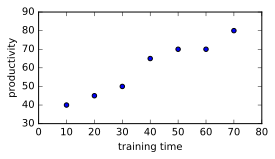

In [1]:
import matplotlib.pylab as plt

X = [10, 20, 30, 40, 50, 60, 70]
y = [40, 45, 50, 65, 70, 70, 80]

plt.figure(figsize=(4, 2))
plt.scatter(X, y)
plt.xlabel("training time"); plt.ylabel("productivity")
plt.show()

> scatter plot 을 보면 훈련시간이 늘어남에 따라 생산성도 높아지고 있음을 쉽게 볼 수 있다. 따라서 훈련시간과 생산성 사이에 밀접한 관계가 있음을 알 수 있다.


- 이처럼 scaater plot 만으로도 두 변수 간의 관계를 대략적으로 파악할 수 있다.
- 그러나 두 변수의관계를 정확히 파악하기 위해서는 두 변수간의 관련성의 정도를 계수(correlation coefficient)로 알아보는 상관분석,
- 두 변수 간의 함수적 관련성을 나타내는 회귀식(regression equation) 또는 예측식을 구하는 회귀분석을 해야 한다.

### 공분산의 개념
- 상관분석을 하기 위해서는 먼저 공분산(covariance)에 대해 알아야 할 필요가 있다.
 - 상관분석이란 두 변수가 어떻게 함께 움직이는가를 알아 보는 것
 - 공분산 역시 두 변수가 동시에 변하는 정도를 나타냄
<br /><br />
- 5장에서 ) 두 확률변수의 분포가 결합확률분포를 이룰 때 그 분포의 분산을 공분산이라 하였다.

$$
\begin{align}
Cov(X, Y) & = E[(X-E(X))(Y-E(Y))] \\
& = E(XY) - E(X) \cdot E(Y)
\end{align}
$$

- 위의 식처럼 모집단의 분포를 아는 경우 기댓값을 사용하여 두 변수 $X, Y$ 간의 공분산을 구하는 방법도 있지만 평균을 사용하여 다음과 같이 공분산을 구할 수 있다.

$$
\begin{align}
모집단 &\quad \sigma_{XY}^2 = \frac{\sum(X_i-\mu_X)(Y_i-\mu_Y)}{n} \\
표 본 &\quad S_{XY}^2 = \frac{\sum(X_i-\bar{X})(Y_i-\bar{Y})}{n-1} \\
\end{align}
$$

- 공분산에서 $X$ 변수가 증가할 때 $Y$ 변수가 증가하면, 즉 두 변수가 같은 방향으로 변화하면 공분산의 수치는 $+$ 가 된다.
- 만일 두 변수가 변화하는 방향이 서로 다르다면 공분산은 $-$ 의 부호를 가진다.
- 이렇듯 공분산은 두 변수 간의 관계를 말해주지만, 두 변수의 측정단위에 따라서 커다란 차이가 나는 문제점이 있어 상대적인 강도를 나타내는 좋은 지표가 되지 못한다.
 - 예를 들어 변수를 센티미터(cm)로 표시되는 경우보다 미터(m)로 표시되는 경우 공분산의 절대값은 훨씬 작아진다.
- 이러한 단위의 문제를 해결하기 위하여 두 변수의 상관관계를 알기 원할 때는 **피어슨 상관계수 $r$** 을 이용한다.

### 상관계수 ( $r$ : correlation coefficient )
- 피어슨(K. Pearson, 1857~1936)이 제시한 상관계수 $r$ 은 정규분포를 따르는 두 변수 $X$ 와 $Y$ 가 일직선이라는 선형성을 가정한다.
- $r_{XY}$ 는 두 변수의 공분산 ($S_{XY}^2$) 을 각 변수의 표준편차인 $S_X$ 와 $S_Y$ 의 곱으로 나누어 상관계수를 구한다.
 - 이로인해 상관계수는 $ -1.0 \le r \le 1.0$ 의 범위에 있게 된다.
- 어떠한 단위의 측정값을 사용하여도 상관성에 대한 비교와 해석이 용이

$$
\begin{align}
모집단 &\quad \rho_{XY} = \frac{\sigma_{XY}^2}{\sigma_X \sigma_Y} \\
표 본 &\quad r_{XY} = \frac{S_{XY}^2}{S_X S_Y} \\
\end{align}
$$

- 상관계수 변형식

$$
\begin{align}
r_{XY} = \frac{n\sum X_i Y_i - \sum X_i \sum Y_i}{\sqrt{n\sum X_i^2 - (\sum X_i)^2} \sqrt{n\sum Y_i^2 - (\sum Y_i)^2}} \\
\end{align}
$$


- 상관계수와 Scatter plot 의 모양
 - $r = +1$ : 완전한 선형관계 ( 완전한 선형관계를 가질 때 공분산 $S_{XY}$ 의 값은 $S_X$ 와 $S_Y$ 를 곱한 값과 같으므로 )
 - $r = -1$ : 완전한 음의 선형관계
 - 분포가 원모양, 곡선의 모양 등의 경우 상관계수가 낮거나 관계가 없는 것처럼 보인다.
   - 이는 피어슨 상관계수는 두 변수 간의 관계가 선형적이라는 가정하에 전개된 계수이기 때문
 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png">

## 2. 단순회귀분석

### 회귀분석의 개념
- 회귀분석의 목적
 - **회귀분석은 함수적 관계로 알고 있는 두 변수의 관계를 자료를 통해 확인해 보는 것 ( 인과관계 파악 )**
 - **한 변수를 기초로 하여 다른 변수를 예측하는 것 ( 예측 )**
 
- 회귀분석 종류
 - 단순회귀분석 ( simple regression analysis ) : 하나의 독립변수와 하나의 종속변수 사이의 관계 분석
 - 다중회귀분석 ( multiple regression analysis ) : 여러개의 독립변수들과 하나의 종속변수 사이의 관계 분석

### 단순회귀모형과 회귀식
- 독립변수와 종속변수 간의 1차함수관계 또는 선형관계를 가정할 때 회귀모형은 다음 두 요소를 결합한 형태로 나타낼 수 있다.
 - 확정적 함수관계를 나타내는 부분 : $\alpha + \beta X_i$
 - 확률적 오차항 : $\epsilon_i$
- $\alpha, \beta$ : 회귀계수 ( regression coefficient )
 - 회귀식을 보면 절편을 $\alpha$ 로 하고 기울기가 $\beta$ 인 직선이 됨을 알 수 있다.
 - 이에 반해서 회귀모형을 그림에서 보면 독립변수와 종속변수가 점으로 나타나 있으며 오차항에 따라서 그 모양이 다양하게 될 수 있다. ( 독립변수에 대응하는 종속변수의 값이 오차항에 따라서 확률적으로 다르게 나타나기 때문 )
 

#### 모집단의 경우

$$
\begin{align}
단순회귀모형 \quad & Y_i = \alpha + \beta X_i + \epsilon_i \\
단순회귀식 \quad & \mu_{Y \cdot X_i} = \alpha + \beta X_i \\
\end{align}
$$

<br />

- 모집단의 회귀식을 구하는 것은 실제로 불가능한 경우가 대부분이므로 우리는 표본으로부터 회귀식을 구하여 모수를 추정하여야 한다.
 - $\hat{Y_i}$ : 회귀식을 통해 구해지는 수치 ( 예측값 )
 - $e_i$ : 예측오차, 추정오차 또는 잔차(residual)
$$e_i = Y_i - \hat{Y_i}$$
 
#### 표본의 경우

$$
\begin{align}
단순회귀모형 \quad & Y_i = a + b X_i + e_i \\
단순회귀식 \quad & \hat{Y_i} = a + b X_i \\
\end{align}
$$

<br />

<div style="float:left;">
    <img src="https://github.com/JKeun/lecture-statistics/blob/develop/%20img/regression-model.png?raw=true", width=320>
</div>
<div style="float:right;">
    <img src="https://github.com/JKeun/lecture-statistics/blob/develop/%20img/regression-equation.png?raw=true", width=370>
</div>

### 오차항에 대한 가정
- 회귀식을 할 땐, 항상 아래의 가정을 제시
- $\epsilon_i \sim iid ~~ N(0, \sigma^2)$

$$
\begin{align}
가정 1 \quad & E(\epsilon_i) = 0 : 오차항의 평균값은 0이다. \\
가정 2 \quad & Var(\epsilon_i) = \sigma^2 : 오차항의 분산은 일정하다. ( 등분산성 ) \\
가정 3 \quad & Cov(\epsilon_i, \epsilon_j) = 0 : 두 개의 오차항은 서로 독립이다. \\
가정 4 \quad & \epsilon_i \sim N(0, \sigma^2) : 오차항은 정규분포를 따른다. \\
\end{align}
$$


## 3. 최소제곱법 ( method of least squares )
- 회귀분석이란 두 변수 간 관련성을 선형함수로 규정하고 이에 필요한 모수인 $\alpha$ 와 $\beta$ 를 표본자료를 통해 규명하려는 것이다. 그렇다면 두 변수 간 선형관계를 가장 잘 나타내는 회귀선은 어떤 것일까?
- 아래의 세 직선 중에서 어느 것이 독립변수 $X$ 와 종속변수 $Y$ 의 관계를 가장 잘 설명해 줄 수 있는 회귀선인가?

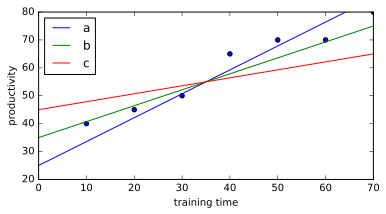

In [2]:
plt.figure(figsize=(6, 3))
plt.scatter(X, y)
plt.xlabel("training time")
plt.ylabel("productivity")
plt.plot((0, 70), (25, 85)); plt.plot((0, 70), (35, 75)); plt.plot((0, 70), (45, 65))
plt.ylim(20, 80); plt.xlim(0, 70)
plt.legend('abc', loc='upper left')
plt.show()

- 가장 좋은 표본회귀식은 전체적으로 추정오차, 즉 잔차를 가장 작게 해 줄 수 있는 것

<img src="http://ssacstat.com/base/component/board/board_12/u_image/20151226063659_2105716877.png", width=350>

#### 최소제곱법 ( method of least squares ) : 잔차의 제곱합이 최소가 되도록 모수를 추정하는 방법
- 회귀식을 결정하는 가장 좋은 방법
- 다른 방법에 의해 구한 회귀식보다 통계학적으로 그 성질이 우수한 $\alpha, \beta$ 의 추정값을 얻을 수 있다.
 - 통계학적으로 우수하다는 것은 표본에서 통계값을 구할 때 그 통계값이 모집단의 모수를 가장 잘 설명하는 추정값이라는 것을 의미

$$min \sum e_i^2 = min \sum(Y_i-\hat{Y_i})^2$$

### 최소제곱법에 의한 추정량 ( ordinary least square estimator )
- $\hat{Y_i}$ 은 회귀모형의 종속변수에 대한 추정값으로서 다음과 같다.
$$\hat{Y_i} = a + b X_i$$


- 최소제곱법 식에 대입하면 다음과 같다.
$$min \sum e_i^2 = min \sum(Y_i-a-bX_i)^2$$


- 잔차제곱합 ( $\sum e_i^2$ ) 을 최소로 하는 $a, b$ 를 찾기 위해 $a, b$ 에 대해 각각 편미분 하면 다음과 같다.
$$
\begin{align}
&\sum Y_i = na + b\sum X_i \\
&\sum X_i Y_i = a \sum X_i + b \sum X_i^2 \\
\end{align}
$$


- 위 두 식을 충족시키는 표본의 회귀계수 $a$ 와 $b$ 는 다음과 같다.
$$
\begin{align}
& b = \frac{n \sum X_i Y_i - \sum X_i \sum Y_i}{n \sum X_i^2 - (\sum X_i)^2} = \frac{\sum X_i Y_i - n \bar{X}\bar{Y}}{\sum X_i^2 - n \bar{X}^2} \\
&a = \bar{Y} - b \bar{X}
\end{align}
$$

- 위 두 식과 같이 잔차제곱합을 최소화시키는 $a$ 와 $b$ 를 회귀모수 $\alpha$ 와 $\beta$ 에 대한 통상최소제곱추정량 ( ordinary least square estimator ) 혹은 최소제곱추정량이라 한다.

### 최소제곱추정량의 특성
1. 최소제곱법에 의해 도출된 추정량은 불편성을 가진다. <br />
\- 즉 추정량 $a$ 와 $b$ 의 평균값은 모수의 회귀계수인 $\alpha$ 와 $\beta$ 의 값과 일치한다.
$$ E(a) = \alpha $$
$$ E(b) = \beta $$

2. 최소제곱추정량 $a$ 와 $b$ 는 종속변수 $Y$ 의 1차함수, 즉 직선의 관계를 갖는다.

3. 최소제곱추정량은 모든 가능한 선형불편추정량 중에서 최소의 분산값을 갖는다.<br />
\- 이때문에 $a$ 와 $b$ 를 $\alpha$ 와 $\beta$ 에 대한 최량선형불편추정량 ( best linear unbiased estimator ) 이라고도 한다.

> **예제.** 10명의 기능공이 일하는 공장에서 그들에게 생산성을 높이는 훈련을 실시하였다. 훈련시간의 정도에 따른 생산성을 예측하기 위해 회귀식을 구하고자 한다. 생산성은 하루에 만들 수 있는 제품의 수로 측정하였다. 회귀식을 구하고, 만약 15시간 훈련을 받은 사람의 예상 생산량은 얼마인지 구하여라.

| 기능공 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 훈련시간 | 2 | 4 | 6 | 8 | 10 | 12 | 14 | 16 | 18 | 20 |
| 생산성 | 10 | 14 | 17 | 19 | 21 | 22 | 24 | 26 | 24 | 23 |

### 회귀계수 $a, b$

$$
\begin{align}
& b = \frac{n \sum X_i Y_i - \sum X_i \sum Y_i}{n \sum X_i^2 - (\sum X_i)^2} = \frac{\sum X_i Y_i - n \bar{X}\bar{Y}}{\sum X_i^2 - n \bar{X}^2} \\
&a = \bar{Y} - b \bar{X}
\end{align}
$$

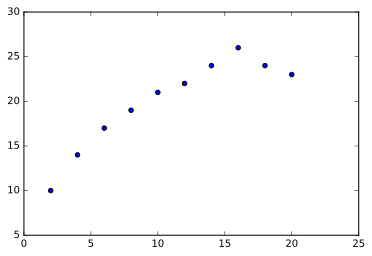

In [3]:
import matplotlib.pylab as plt
import numpy as np

X = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y = np.array([10, 14, 17, 19, 21, 22, 24, 26, 24, 23])

n = len(X)

plt.scatter(X, y)
plt.show()

In [4]:
print(np.dot(X, y))
print(np.dot(X, X))
print(np.sum(X))
print(np.sum(y))

2448
1540
110
200


In [5]:
b = (n * np.dot(X,y) - np.sum(X)*np.sum(y)) / (n*np.dot(X, X) - (np.sum(X))**2)
a = np.mean(y) - b * np.mean(X)

print(a)
print(b)

11.7333333333
0.751515151515


- 예측

In [6]:
def linear_model(x):
    result = b * x + a
    print(result)
linear_model(15)

23.0060606061


### sklearn 을 활요한 회귀식 도출

In [7]:
from sklearn.linear_model import LinearRegression

X = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
y = np.array([10, 14, 17, 19, 21, 22, 24, 26, 24, 23])

X = X.reshape(len(X), 1)
y = y.reshape(len(y), 1)
model = LinearRegression().fit(X, y)

print(model.coef_)
print(model.intercept_)

[[ 0.75151515]]
[ 11.73333333]


/Users/jkpark/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


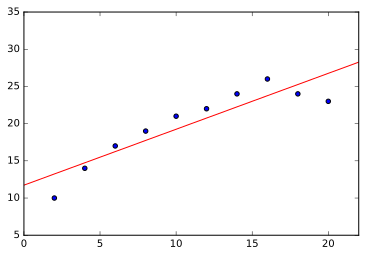

In [8]:
XX = np.arange(0, 25)
yy = model.coef_ * XX + model.intercept_
yy = np.array(yy).reshape(25)

plt.plot(XX, yy, "r-")
plt.scatter(X, y)
plt.xlim(0, 22)
plt.show()